In [6]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy
from tqdm import tqdm
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances


x,y = make_classification(n_samples=10000, n_features=2, n_informative=2, n_redundant= 0, n_clusters_per_class=1, random_state=60)
X_train, X_test, y_train, y_test = train_test_split(x,y,stratify=y,random_state=42)
# del X_train,X_test


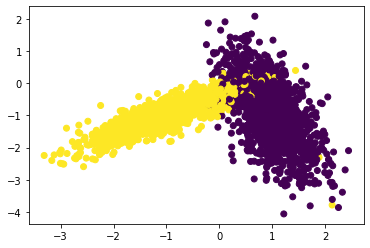

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
colors = {0:'red', 1:'blue'}
plt.scatter(X_test[:,0], X_test[:,1],c=y_test)
plt.show()

In [8]:
def randomly_select_in_range_from_1_to_len(x_train):
    return random.sample(range(0, len(x_train)),int(0.6*len(x_train)))

def Random_search(x_train, y_train, classifier, folds, param_range, num_param = 10):
    trainscore = []
    testscore = []
    K_values = sample(range(param_range[0],param_range[1]),num_param)
    K_values.sort()
    print('k range:',K_values)
    for k in tqdm(K_values):
        trainscore_folds = []
        testscore_folds = []
        for j in range(0, folds):
            train_indices = randomly_select_in_range_from_1_to_len(x_train)
            test_indices = list(set(list(range(1, len(x_train)))) - set(train_indices))

            X_train = x_train[train_indices]
            Y_train = y_train[train_indices]
            X_test = x_train[test_indices]
            Y_test = y_train[test_indices]

            classifier.n_neighs = k
            classifier.fit(X_train, Y_train)

            Y_predicted = classifier.predict(X_test)
            testscore_folds.append(accuracy_score(Y_test, Y_predicted))

            Y_predicted = classifier.predict(X_train)
            trainscore_folds.append(accuracy_score(Y_train, Y_predicted))
        trainscore.append(np.mean(np.array(trainscore_folds)))
        testscore.append(np.mean(np.array(testscore_folds)))
    return trainscore, testscore , K_values

In [9]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import random
import warnings

warnings.filterwarnings("ignore")

from random import sample 

classifier = KNeighborsClassifier()
param_min = 3 #a
param_max = 50 #b
k_fold = 3
param_range = (param_min,param_max) #tuple (a,b) a<b
print(type(param_range),param_range)
trainscore, testscore, K_values = Random_search(X_train, y_train, classifier, k_fold, param_range)

<class 'tuple'> (3, 50)
k range: [7, 11, 13, 15, 16, 18, 32, 40, 44, 49]


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:08<00:00,  1.19it/s]


In [10]:
print(testscore)

[0.9513278870734689, 0.9503277018265348, 0.9514335519247156, 0.9524392204809011, 0.9503281834685636, 0.9551014782705346, 0.9508888888888888, 0.9492168130117445, 0.951772405616687, 0.9512165907154236]


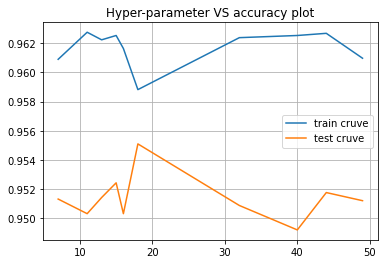

In [11]:
plt.plot(K_values,trainscore, label='train cruve')
plt.plot(K_values,testscore, label='test cruve')
plt.title('Hyper-parameter VS accuracy plot')
#plt.plot(K_values, '-gD', markevery=markers_on)
plt.legend()
plt.grid()
plt.show()

In [12]:
def plot_decision_boundary(X1, X2, y, clf):
        # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    x_min, x_max = X1.min() - 1, X1.max() + 1
    y_min, y_max = X2.min() - 1, X2.max() + 1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    # Plot also the training points
    plt.scatter(X1, X2, c=y, cmap=cmap_bold)
    
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("2-Class classification (k = %i)" % (clf.n_neighbors))
    plt.show()

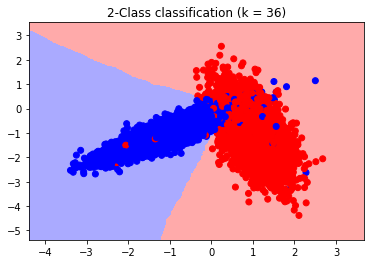

In [13]:
from matplotlib.colors import ListedColormap
classifier = KNeighborsClassifier( n_neighbors = 36)
classifier.fit(X_train, y_train)
plot_decision_boundary(X_train[:, 0], X_train[:, 1], y_train, classifier)